<h1> INTENTO PLANTEADO</h1>

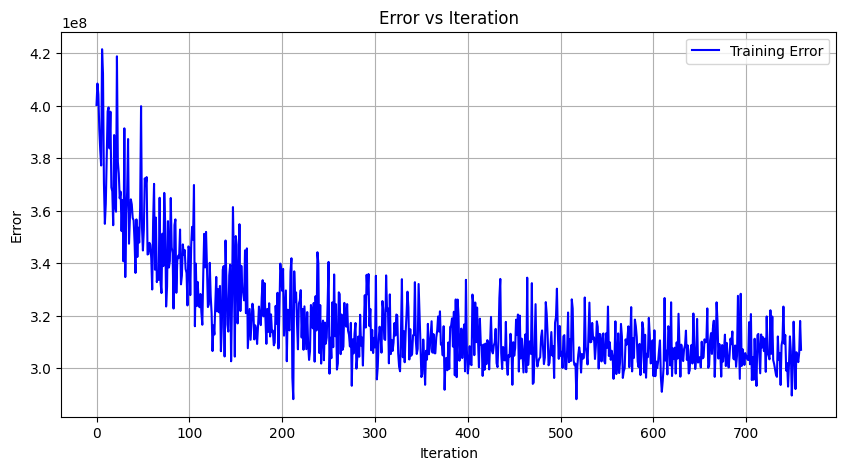

Mean Squared Error on Test Data: 308128947.54
R^2 Score on Test Data: -2.07


In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Leer los datos
actual_data = pd.read_csv('../usableData/complete_data_coded.csv')

# Separar las características (features) y la variable objetivo (target)
x_vec = actual_data.drop('price', axis=1)
y_vec = actual_data['price']

# Normalizar los datos
scaler = StandardScaler()
x_vec_normalized = scaler.fit_transform(x_vec)

# Convertir de nuevo a DataFrame
x_vec = pd.DataFrame(x_vec_normalized, columns=x_vec.columns)

# Dividir los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x_vec, y_vec, test_size=0.2, random_state=42)

# Parameters
w = np.random.randn(x_train.shape[1]) * 0.001
alpha = 0.001
epochs = 10
batch_size = 1000
m = len(y_train)

error_vec = []

for epoch in range(epochs):
    # Shuffle and batch the dataset
    indices = np.random.permutation(m)
    x_train_shuffled = x_train.values[indices]
    y_train_shuffled = y_train.values[indices]
    
    for i in range(0, m, batch_size):
        # Create mini-batches
        x_batch = x_train_shuffled[i:i+batch_size]
        y_batch = y_train_shuffled[i:i+batch_size]
        
        # Predict and compute error
        y_pred_batch = np.dot(x_batch, w)
        error_batch = y_pred_batch - y_batch
        
        # Gradient descent update
        gradient = (2/batch_size) * np.dot(x_batch.T, error_batch)
        w = w - alpha * gradient
        
        # Store the error
        error_vec.append(np.mean(error_batch**2))
        
plt.figure(figsize=(10, 5))
plt.plot(error_vec, label='Training Error', color='blue')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error vs Iteration')
plt.legend()
plt.grid(True)
plt.show()

error_vec[-10:]  # displaying the last 10 errors for brevity

y_pred_test = np.dot(x_test.values, w)
error_test = y_pred_test - y_test

# Calculating Mean Squared Error (MSE) for test data
mse_test = np.mean(error_test**2)

print(f"Mean Squared Error on Test Data: {mse_test:.2f}")

ss_res = np.sum((y_pred_test - y_test) ** 2)
ss_tot = np.sum((y_test - y_test.mean()) ** 2)
r2 = 1 - (ss_res / ss_tot)

print(f"R^2 Score on Test Data: {r2:.2f}")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

actual_data = pd.read_csv('usableData/complete_data_coded.csv')

x_vec = actual_data.drop('price', axis=1)
y_vec = actual_data['price']

# Normalizar los datos
scaler = StandardScaler()
x_vec_normalized = scaler.fit_transform(x_vec)

# Convertir de nuevo a DataFrame
x_vec = pd.DataFrame(x_vec_normalized, columns=x_vec.columns)

x_train, x_test, y_train, y_test = train_test_split(x_vec, y_vec, test_size=0.2, random_state=42)

# Inicializar los pesos con valores más pequeños
w = np.random.randn(len(x_vec.columns)) * 0.001
alpha = 0.00001
epochs = 500
batch_size = 1000

error_vec = []

for i in range(epochs):
    x_train_sample = x_train.sample(n=batch_size, replace=True)
    y_train_sample = y_train[x_train_sample.index]
    
    for j in range(batch_size):
        x_j = x_train_sample.iloc[j].values  # Aquí usamos .values para obtener el array de numpy
        y_j = y_train_sample.iloc[j]
        
        y_j_pred = np.dot(w, x_j)
        error = (y_j_pred - y_j)
        error_vec.append(error**2)
        
        gradient = (-2)*x_j*error
        
        w = w + alpha*gradient


plt.figure(figsize=(10, 5))
plt.plot(error_vec, label='Training Error', color='blue')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error vs Iteration')
plt.legend()
plt.grid(True)
plt.show()

error_vec[-10:]  # displaying the last 10 errors for brevity

y_pred_test = np.dot(x_test.values, w)
error_test = y_pred_test - y_test

# Calculating Mean Squared Error (MSE) for test data
mse_test = np.mean(error_test**2)

print(f"Mean Squared Error on Test Data: {mse_test:.2f}")

ss_res = np.sum((y_pred_test - y_test) ** 2)
ss_tot = np.sum((y_test - y_test.mean()) ** 2)
r2 = 1 - (ss_res / ss_tot)

print(f"R^2 Score on Test Data: {r2:.2f}")

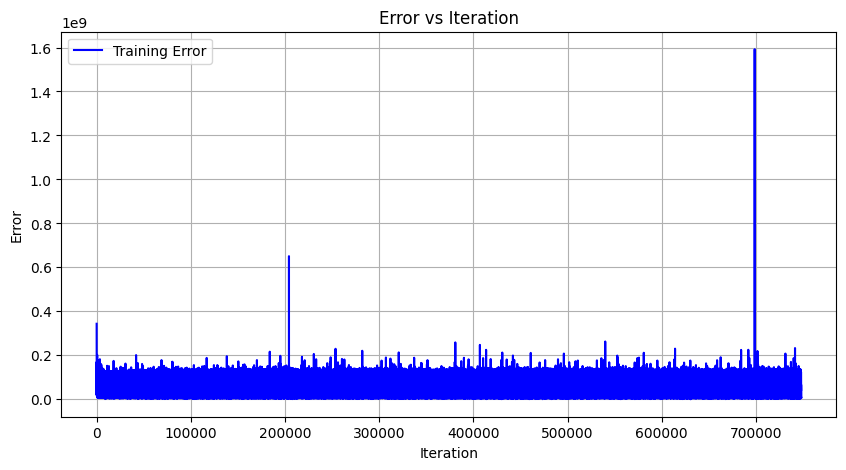

Mean Squared Error on Test Data: 14818032.85
R^2 Score on Test Data: 0.85


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# Leer los datos
actual_data = pd.read_csv('../usableData/complete_data_coded.csv')

# Convertir columnas booleanas a int
x_vec = actual_data.drop('price', axis=1).astype(int)
y_vec = actual_data['price']

# Normalización Min-Max
x_vec_normalized = (x_vec - x_vec.min()) / (x_vec.max() - x_vec.min())

# Convertir de nuevo a DataFrame
x_vec = pd.DataFrame(x_vec_normalized, columns=x_vec.columns)

# Dividir los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x_vec, y_vec, test_size=0.2, random_state=42)

# Tomar una fracción del conjunto de entrenamiento para reducir el tamaño de datos
sample_fraction = 0.99
x_train_sample, _, y_train_sample, _ = train_test_split(x_train, y_train, train_size=sample_fraction, random_state=42)

# Definir m_sample
m_sample = len(y_train_sample)

# Ajustar parámetros
alpha = 0.1  # Aumentando la tasa de aprendizaje
epochs = 1000  # Aumentando el número de épocas
batch_size = 100

w = np.random.randn(x_train.shape[1]) * 0.01  # Re-inicializando pesos

error_vec_sample_adjusted = []

for epoch in range(epochs):
    # Mezclar y dividir el conjunto de datos
    indices = np.random.permutation(m_sample)
    x_train_shuffled = x_train_sample.values[indices]
    y_train_shuffled = y_train_sample.values[indices]
    
    for i in range(0, m_sample, batch_size):
        # Crear mini-lotes
        x_batch = x_train_shuffled[i:i+batch_size]
        y_batch = y_train_shuffled[i:i+batch_size]
        
        # Predecir y calcular el error
        y_pred_batch = np.dot(x_batch, w)
        error_batch = y_pred_batch - y_batch
        
        # Actualización del descenso del gradiente
        gradient = (2/batch_size) * np.dot(x_batch.T, error_batch)
        w = w - alpha * gradient
        
        # Almacenar el error
        error_vec_sample_adjusted.append(np.mean(error_batch**2))
        
# Probar el modelo en el conjunto de prueba completo
y_pred_test = np.dot(x_test.values, w)
error_test = y_pred_test - y_test

# Calcular el error cuadrático medio (MSE) para los datos de prueba
mse_test = np.mean(error_test**2)

# Calcular R^2
ss_res = np.sum((y_pred_test - y_test) ** 2)
ss_tot = np.sum((y_test - y_test.mean()) ** 2)
r2 = 1 - (ss_res / ss_tot)

plt.figure(figsize=(10, 5))
plt.plot(error_vec_sample_adjusted, label='Training Error', color='blue')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error vs Iteration')
plt.legend()
plt.grid(True)
plt.show()

print(f"Mean Squared Error on Test Data: {mse_test:.2f}")
print(f"R^2 Score on Test Data: {r2:.2f}")